In [1]:
import pandas as pd

In [2]:
#reading the dataset
df=pd.read_csv(r"C:\Users\User\Downloads\DATASETS\train.csv(1)\train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
#we going to drop the NaN values in datastet
df=df.dropna()

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

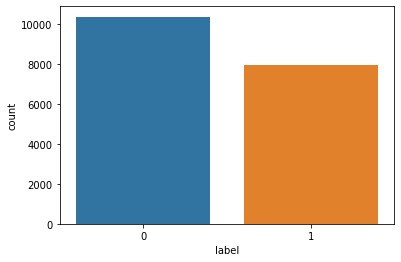

In [5]:
#Visulaizing whether it is balanaced dataset or not
import seaborn as sns
sns.countplot(df['label'])

In [6]:
df['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [7]:
7924/10361

0.7647910433355853

#It is balacnced dataset not need to under or down sample the dataset

In [8]:
#splitting in training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['title'],df['label'], stratify=df['label'])

#So importing pretarined models from Tensorflow hub

In [9]:
#libaries needed
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [10]:
bert_preprocess=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

# Creating a Functional Model

In [11]:
#Let create the BERT layer
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
bert_preprocessed_data=bert_preprocess(text_input)
bert_encoded_data=bert_encoder(bert_preprocessed_data)

In [12]:
#creating nerual networks
l=tf.keras.layers.Dropout(0.1,name='dropout')(bert_encoded_data['pooled_output'])
l=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(l)
#bcz we just want the pooled output from the bert_encoded_data


#creating a model by giving input and output
model=tf.keras.Model(inputs=[text_input],outputs=[l])


In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_mask': (None 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'pooled_output': (N 109482241   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
______________________________________________________________________________________________

In [14]:
#metrics
METRICS=[tf.keras.metrics.BinaryAccuracy(name='Accuracy'),
         tf.keras.metrics.Precision(name='precision'),
         tf.keras.metrics.Recall(name='recall')]
#model_complie
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [21]:
#train the model 
model.fit(X_train,y_train,batch_size=2)

6857/6857 [==============================] - 9732s 1s/step - loss: 0.4145 - Accuracy: 0.8062 - precision: 0.7734 - recall: 0.7821


In [22]:
model.evaluate(X_test,y_test)

143/143 [==============================] - 3159s 22s/step - loss: 0.3796 - Accuracy: 0.7957 - precision: 0.8446 - recall: 0.6477


[0.37961545586586, 0.7957130074501038, 0.8446346521377563, 0.6476526856422424]

In [27]:
#prediction time
y_predict=model.predict(X_test)

In [30]:
y_predicted=y_predict.flatten()

In [34]:
import numpy as np
y_predicted=np.where(y_predicted>0.5,1,0)
y_predicted

array([1, 1, 1, ..., 0, 1, 0])

In [38]:
#confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_predicted)
cm

array([[2355,  236],
       [ 698, 1283]], dtype=int64)

Text(33.0, 0.5, 'predicted_data')

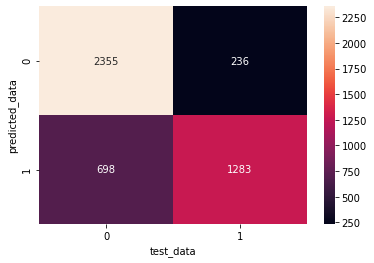

In [39]:
#plotting confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('test_data')
plt.ylabel('predicted_data')


In [40]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      2591
           1       0.84      0.65      0.73      1981

    accuracy                           0.80      4572
   macro avg       0.81      0.78      0.78      4572
weighted avg       0.80      0.80      0.79      4572

